# Linear Regression - Predicting GPA based on SAT scores

The SAT is a test widely used for college admission in USA.

In this section we will be using the linear regression algorithm to predict the average GPA cumulated by a student in the college, based only on the scores that he/she achieved in SAT.

<br>

Before we get started we need to import the following libraries:

1. Pandas  - Library providing high-performance, easy-to-use data structures and data analysis tools.
2. Numpy  -  Fundamental package for scientific computing with Python
3. SKLearn - Simple and efficient tools for data mining and data analysis

In [0]:
# Import all the necessary libraries
from __future__ import print_function
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score, max_error, r2_score

##Load Dataset

ToDo:

- View the dataset 
- View the Summary Statistics
- Visualizing the data in a scatter graph

In [29]:
# Now that our packages are loaded, let's read in and take a peek at the data
url = 'https://ai-camp-content.s3.amazonaws.com/1.Simple-linear-regression.csv'

# Dataset is now stored in a Pandas Dataframe
df = pd.read_csv(url)  

#Now view the number of rows and columns in the dataframe using .shape
df.shape

(84, 2)

In [30]:
# View the first 10 rows in the dataset
df.head(10)

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
5,1670,2.91
6,1764,3.00
7,1764,3.00
8,1792,3.01
9,1850,3.01


In [31]:
# View the Summary Statistics for the numeric columns in the dataset
df.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


## Visualizing Data
Scatter plots show how much one variable is affected by another. The relationship between two variables is called their correlation.

<br>

Create a scatter plot with the SAT and GPA data - Look back at the data cleaning tutorial we did yesterday if you need a refresher on doing this.

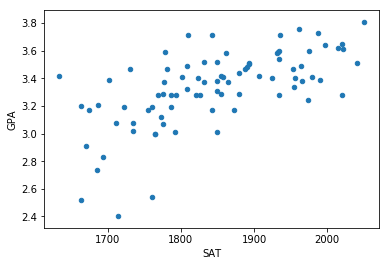

In [32]:
#Create scatter graph
df.plot(kind = 'scatter', x='SAT', y='GPA')

##Manipulating the Data

Pandas Dataframe has the indexer *iloc* that is used to select rows and columns by number.

The syntax is `data.iloc[<row_selection>][<column_selection>]`

Example: `data.iloc([0, 2], [1, 3])` will retrieve the rows indexed 0 and 2, and the columns indexed with 1 and 3.

In [0]:
# Now we use iloc to separate the X and Y values of our dataset

X = df.iloc[:,0].values # Retrieve the first column from the dataset, i.e. SAT
Y = df.iloc[:,1].values # Retrieve the second column from the dataset, i.e. GPA

# Reshape the arrays so that they have the right structure the library expects
# When fitting the model, we need a 2D array so that each row of data
# from the original data source is in its own array

#X,Y

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)

# To better understand what reshape is doing, try printing X and Y values 
# before and after applying the reshape function
#X,Y

##Split the Data
We need to split the dataset into training and validation data. The training set is much larger than the test set as the model will achieve a higher accuracy with more data to look at. Validation only needs to be a smaller percentage of the overall set, the model will not have seen the validation set during training, so we can use it to test if the model is predicting correctly.

In [0]:
# We can use the SKLearn train_test_split method to do the split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)


##Define and train the model
We now need to create the classifier that we will use and train it with our data. 

We have imported the Linear Regression classifier in at the top, so can go ahead and use it - further information about this classifier and its parameters can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

To Do:
- Fit the model
- Predict the GPA values for the test data given
- Find out how accurate our model was 

In [42]:
# Create our model using linear regression
model = LinearRegression(fit_intercept=True, normalize=True)

# To train the model we use the .fit method on the model, this will take in both out x and y training data as its parameters
# Go ahead and train the model
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

##Test the model

In [43]:
# Now we want to predict the GPA values on the test SAT dataset
# We can use the .predict method on the model and this will take in out x_test data - give it a try
predictions = model.predict(x_test)

#We use x_test here as it will then predict associated y values with we compare with our true test y values

#Print out the predictions
predictions

[[3.18345349]
 [3.34739384]
 [3.06903678]
 [3.23980798]
 [3.00243601]
 [3.37130181]
 [3.16808408]
 [3.11685272]
 [3.2141923 ]
 [3.22273086]
 [3.46010284]
 [3.0861139 ]
 [3.32177816]
 [3.61208921]
 [3.15954552]
 [3.27225451]
 [3.60355065]
 [3.46522597]
 [3.33373215]
 [3.61379692]
 [3.66332057]
 [3.25005426]
 [3.32177816]
 [3.64795116]
 [3.38496351]
 [3.44985656]]


In [40]:
# Comparing with the actual GPA values from the test dataset by printing the y_test data
y_test

array([[3.28],
       [3.37],
       [3.39],
       [3.41],
       [3.2 ],
       [3.44],
       [2.54],
       [3.47],
       [3.28],
       [3.01],
       [3.58],
       [3.08],
       [3.52],
       [3.65],
       [3.17],
       [3.28],
       [3.62],
       [3.6 ],
       [3.41],
       [3.61],
       [3.81],
       [3.49],
       [3.38],
       [3.51],
       [3.47],
       [3.4 ]])

##Metrics

When predicting a continuous value like the price of a house or a stock price we can’t use an accuracy metric, so we have to use what is known as the mean squared error (MSE). The MSE is the average squared difference between the actual and predicted values. We want to minimise this to improve our accuracy.  

<br>

### Score

Returns the coefficient of determination R^2 of the prediction.

The coefficient R^2 is defined as (1 - u/v), where 

*   u = residual sum of squares ((y_true - y_pred) ** 2).sum() 
*   v = the total sum of squares ((y_true - y_true.mean()) ** 2).sum(). 

The best possible score is 1.0 (perfect prediction) and it can be negative (because the model can be arbitrarily worse). 
A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

<br>

ToDo:
- Get the score of the model 

In [44]:
# To get the score we can use the .score method on the model and we pass in both x and y test as parameters - try it out
model.score(x_test, y_test)

0.3965243615272974


### max_error

The max_error function computes the maximum residual error , a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

In [45]:
max_error(y_test, predictions)

0.6280840797209164

## Exercises 



1.   Give some examples of:

*   Non related variables.
*   Variables that are increasingly related.
*   Variables that are decreasingly related.

2.   Create your own testing data with very high/low values and see how good your model's predictions are on edge cases.



In [0]:
### Add code here to solve the exercise


## Multivariate regression 

It is rare that a dependent variable is explained by only one variable. In this case, an analyst uses multiple regression, which attempts to explain a dependent variable using more than one independent variable. Multiple regressions can be linear and nonlinear.

 

It uses a complex linear equation : 


    f(x, y, z) = (w1 * x) + (w2 * y) + (w3 * z) 

    x, y, z = input data 

    w = weights 


Example:  

    Sales = (w1 * Radio) + (w2 * TV) + (w3 * News) 
    

Whereas simple regression uses the simple straight line equation

            y = mx + c


            y => prediction
            x => input data
            m => weight
            c => Bias

Example:

            Sales = (Weight x Radio) + Bias


For further information on this Navigate to the  link below for a practical example of using multiple linear regression to predict stock price using two independent variables: interest rate and unemployment rate.

https://datatofish.com/multiple-linear-regression-python/